<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [77]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [78]:
# Read CSV
house_csv = "../../DATA/Sacramento_transactions.csv"
df = pd.read_csv(house_csv)

In [79]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [80]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [81]:
df.isna().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [83]:
df['zip'] = df['zip'].astype(str)


In [84]:
df['sale_date']

0      Wed May 21 00:00:00 EDT 2008
1      Wed May 21 00:00:00 EDT 2008
2      Wed May 21 00:00:00 EDT 2008
3      Wed May 21 00:00:00 EDT 2008
4      Wed May 21 00:00:00 EDT 2008
                   ...             
980    Thu May 15 00:00:00 EDT 2008
981    Thu May 15 00:00:00 EDT 2008
982    Thu May 15 00:00:00 EDT 2008
983    Thu May 15 00:00:00 EDT 2008
984    Thu May 15 00:00:00 EDT 2008
Name: sale_date, Length: 985, dtype: object

In [85]:
#df['sale_date']= pd.to_datetime(df['sale_date'])
df['sale_date'] = pd.to_datetime(df['sale_date'].str.replace('EDT', 'UTC+4'))


/var/folders/cj/rzmp7kfn4jg08km6g547jdsjk73ykr/T/ipykernel_77307/954466485.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sale_date'] = pd.to_datetime(df['sale_date'].str.replace('EDT', 'UTC+4'))


In [86]:
df['sale_date']

0     2008-05-21 00:00:00-04:00
1     2008-05-21 00:00:00-04:00
2     2008-05-21 00:00:00-04:00
3     2008-05-21 00:00:00-04:00
4     2008-05-21 00:00:00-04:00
                 ...           
980   2008-05-15 00:00:00-04:00
981   2008-05-15 00:00:00-04:00
982   2008-05-15 00:00:00-04:00
983   2008-05-15 00:00:00-04:00
984   2008-05-15 00:00:00-04:00
Name: sale_date, Length: 985, dtype: datetime64[ns, UTC-04:00]

In [87]:
df.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


<Axes: xlabel='type'>

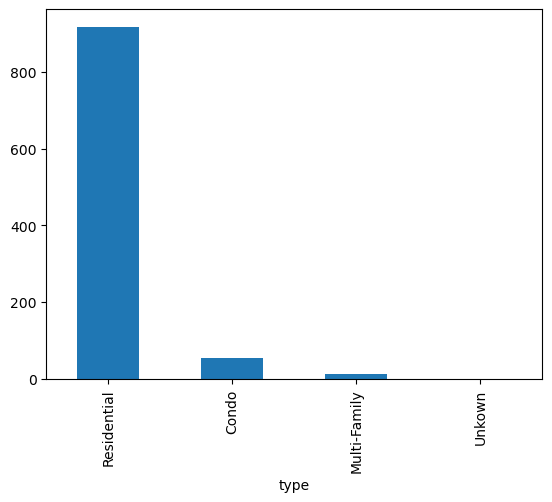

In [90]:
# Number of the types of data

df['type'].value_counts().plot(kind='bar')

<Axes: ylabel='city'>

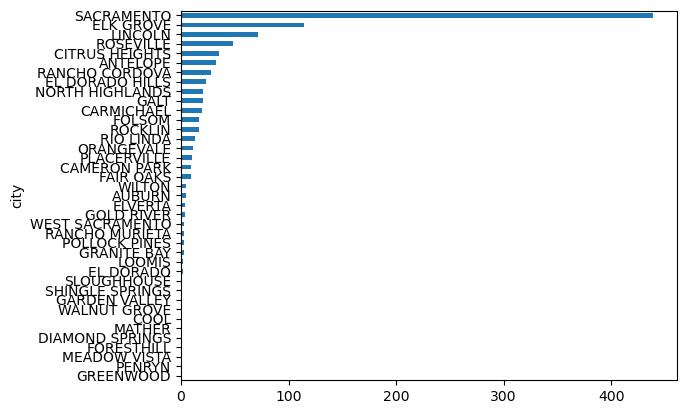

In [91]:
# Number of data by city
df['city'].value_counts().sort_values().plot(kind='barh')

/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


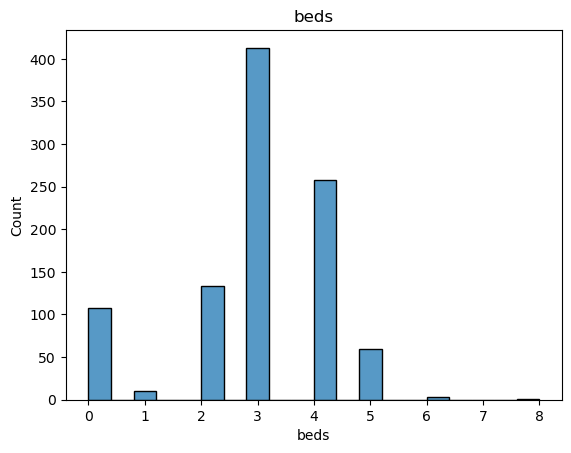

/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


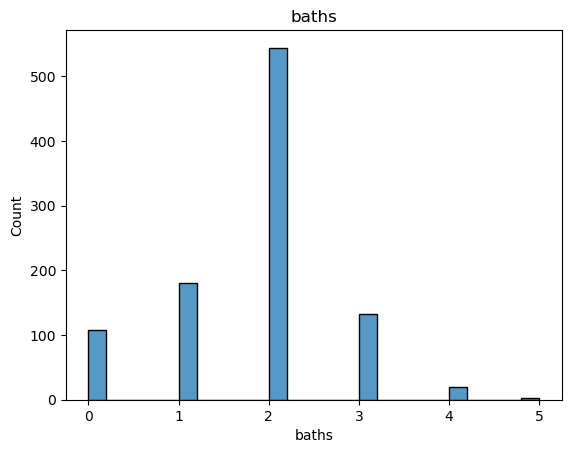

/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


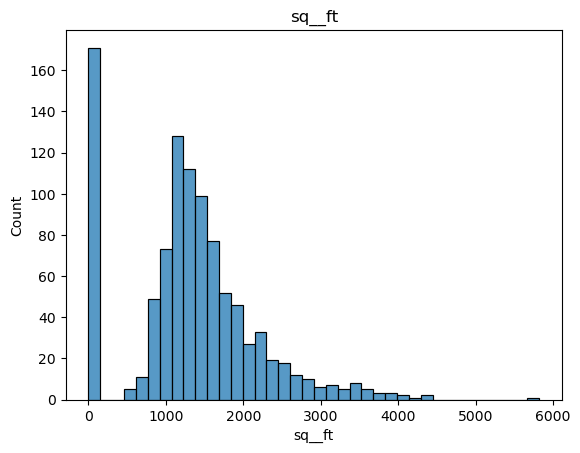

/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


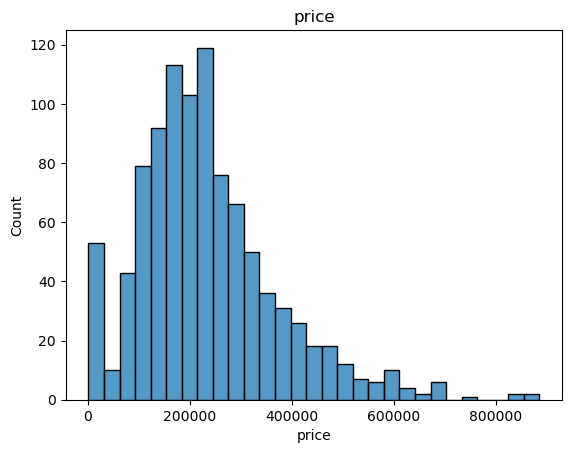

In [92]:
for_histogram = ['beds','baths','sq__ft','price']

for i in for_histogram:
    sns.histplot(df, x=i)
    plt.title(i)
    plt.show()

/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='type', ylabel='price'>

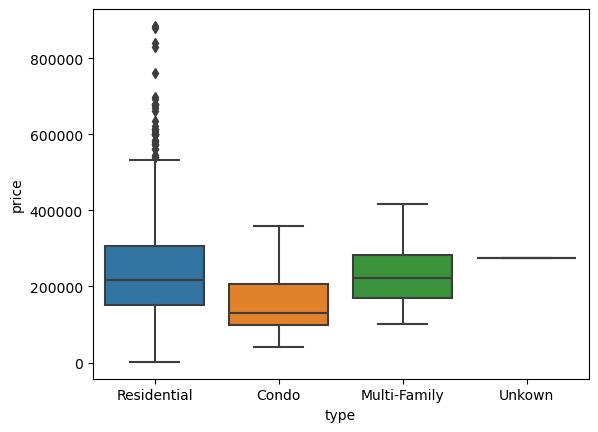

In [93]:
sns.boxplot(data=df, x='type', y='price')

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

#### ANSWER

Price. We want to be able to predict the price base on other variables such as the number of bed, bath, the area and the location. 

#### 2.2 List all possible variables which might be Independent/Predictor variable.

#### ANSWER
- Number of bed
- Number of bath
- The area (sq_ft)
- Type - residential has a big range.



#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [95]:
df[for_histogram].corr()

,beds,baths,sq__ft,price
beds,1.000000,0.839650,0.684041,0.342024
baths,0.839650,1.000000,0.665690,0.416208
sq__ft,0.684041,0.665690,1.000000,0.333897
price,0.342024,0.416208,0.333897,1.000000


- Beds and baths are highly correlated.
- Beds and baths are highly correlated with sq_ft. 
- Baths seem to be highly correlated with price. (0.416)

/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


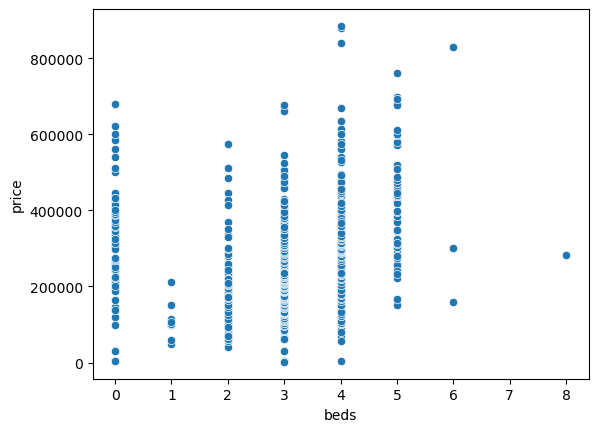

/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


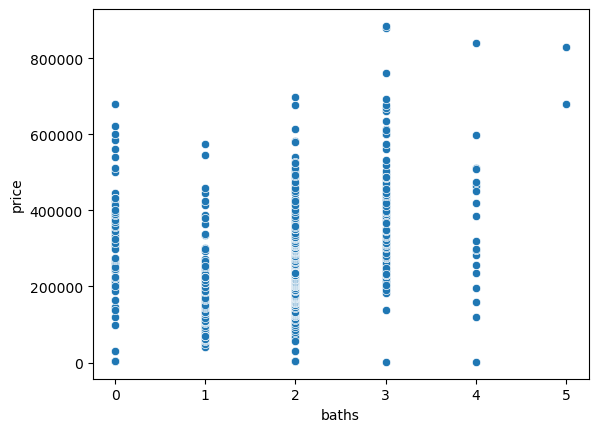

/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


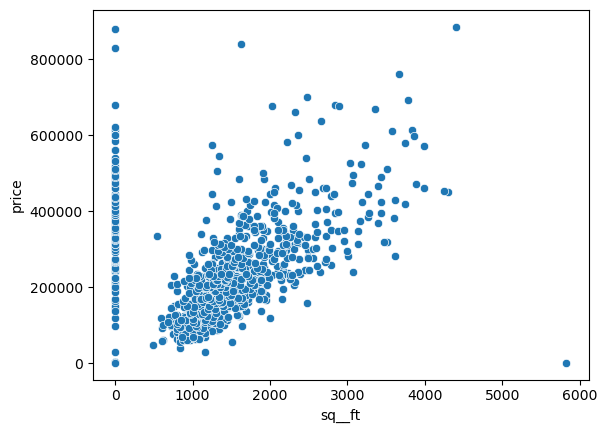

In [101]:
for i in for_histogram:
    if i != 'price':
        sns.scatterplot(data=df, x=i, y='price')
        plt.show()

### ANSWER

See above

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [103]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [104]:
# ANSWER

X = df['sq__ft'].values.reshape(-1,1)
Y = df['price']

linreg=LinearRegression()
linreg.fit(X,Y)
print(linreg.coef_, linreg.intercept_)

[54.15863969] 162930.16140699777


/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [105]:
# ANSWER
linreg.score(X, Y)

/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.11148717682951437

### 3. Splitting Data

In [106]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [107]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

#### 3.2 Check Shape, Sample of Test Train Data

In [108]:
# ANSWER
## Check training/test data
print('X_train is a %s' % type(X_train))
print('X_train has %d rows', X_train.shape[0])
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_train[:10])

print('')
print('y_train is a %s' % type(y_train))
print('y_train has %d rows', y_train.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(y_train[:10])

X_train is a <class 'numpy.ndarray'>
X_train has %d rows 788

Sample of X_train__________________________________________________
[[1029]
 [1104]
 [1418]
 [1245]
 [ 990]
 [   0]
 [   0]
 [3838]
 [1520]
 [   0]]

y_train is a <class 'pandas.core.series.Series'>
y_train has %d rows (788,)

Sample of y_train__________________________________________________
659    168750
202    156000
35     146250
383    139500
610     66500
544    512000
248    240000
330    613401
116    299000
575      4897
Name: price, dtype: int64


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [109]:
# ANSWER
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_, linreg.intercept_)

[52.73122792] 168682.5632819861


/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [110]:
# ANSWER
linreg.score(X_test, y_test)

/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.13208826355801895

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [111]:
# ANSWER
beta0 = linreg.intercept_
beta1 = linreg.coef_
x = 1204

Ypred = beta1 * x + beta0
print('Predicted house price: ', Ypred[0])

Predicted house price:  232170.96169796697


#### Find the error

In [114]:
# Predict price from X_test

from sklearn.metrics import mean_squared_error

y_preds = linreg.predict(X_test)

mean_squared_error(y_test, y_preds, squared=True)

/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/140837/anaconda3/envs/IOD/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


12626382768.201777



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



